In [15]:
import pandas as pd
import numpy as np
cars = pd.read_csv('imports-85.data')

In [16]:
print(cars.columns.values.tolist())
cars.shape

['3', '?', 'alfa-romero', 'gas', 'std', 'two', 'convertible', 'rwd', 'front', '88.60', '168.80', '64.10', '48.80', '2548', 'dohc', 'four', '130', 'mpfi', '3.47', '2.68', '9.00', '111', '5000', '21', '27', '13495']


(204, 26)

The column names are not in the right spots.

Let's try to take a look a the head of the dataset

In [17]:
print(cars.head(5))

   3    ?  alfa-romero  gas  std   two  convertible  rwd  front  88.60  ...    \
0  3    ?  alfa-romero  gas  std   two  convertible  rwd  front   88.6  ...     
1  1    ?  alfa-romero  gas  std   two    hatchback  rwd  front   94.5  ...     
2  2  164         audi  gas  std  four        sedan  fwd  front   99.8  ...     
3  2  164         audi  gas  std  four        sedan  4wd  front   99.4  ...     
4  2    ?         audi  gas  std   two        sedan  fwd  front   99.8  ...     

   130  mpfi  3.47  2.68  9.00  111  5000  21  27  13495  
0  130  mpfi  3.47  2.68   9.0  111  5000  21  27  16500  
1  152  mpfi  2.68  3.47   9.0  154  5000  19  26  16500  
2  109  mpfi  3.19  3.40  10.0  102  5500  24  30  13950  
3  136  mpfi  3.19  3.40   8.0  115  5500  18  22  17450  
4  136  mpfi  3.19  3.40   8.5  110  5500  19  25  15250  

[5 rows x 26 columns]


It seems that the column names are missing from our dataset.

Luckily we can get it from:
https://archive.ics.uci.edu/ml/datasets/automobile.

In [18]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)
cars

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,?


Better!

We still have some issue with these data,
specifically with the 'normalized-losses' column that is full of '?'.

Let's change these '?' with a customary NaN

In [19]:
cars = cars.replace('?', np.NaN)

Now we select just the numeric columns, with continuous values.

In [20]:
nr_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
nr_cars = cars[nr_cols]
nr_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


We check the the amount and the location of the null data.

In [21]:
nr_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [22]:
nr_cars = nr_cars.astype('float')
nr_cars = nr_cars.dropna(subset=['price'])
nr_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [23]:
nr_cars = nr_cars.drop('normalized-losses', 1)
nr_cars = nr_cars.fillna(nr_cars.mean())# updated situation of the missing values
nr_cars.isnull().sum()

wheel-base          0
length              0
width               0
height              0
curb-weight         0
bore                0
stroke              0
compression-rate    0
horsepower          0
peak-rpm            0
city-mpg            0
highway-mpg         0
price               0
dtype: int64

First thing we did was to convert the whole dataset
to float, to ease our management of it.

After that, with a combination of techniques, we cleaned the
data from the null values.

Specifically, we cut the 'normalized-losses '
column, that had 41 missing values.

We dropped the rows with missing prices.

We replaced the other few missing value with the mean 
of the corrisponding column.

In [24]:
price = nr_cars['price']
nr_cars = (nr_cars - nr_cars.min())/(nr_cars.max() - nr_cars.min())
nr_cars['price'] = price
nr_cars.head()

,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


We normalized the values in order to have numbers among 0 and 1
Clearly not the values in the 'price' column

In [25]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_cols, target_cols, df):
    # we want to randomize the order of the rows of our dataset
    np.random.seed(1)
    random_index = np.random.permutation(df.index)
    random_df = df.reindex(random_index)
    # we start instantiating KNeighborsRegressor to knn
    knn = KNeighborsRegressor()
    # we'll share our dataset in two halfs
    middle_index = int(len(random_df) / 2)
    train_df = random_df.iloc[0:middle_index]
    test_df = random_df.iloc[middle_index:]
    # fit the model
    knn.fit(train_df[[train_cols]], train_df[target_cols])
    # make predictions
    predictions = knn.predict(test_df[[train_cols]])
    # calculate rmse and return it
    mse = mean_squared_error(test_df[target_cols], predictions)
    rmse = np.sqrt(mse)
    return rmse

rmse = {}
train_cols = nr_cars.columns.drop('price')
# for every columns, call the function knn_train_test
# to check the rmse value
# we are looking for the maximum
for i in train_cols:
    rmse[i] = knn_train_test(i, 'price', nr_cars)
# let's take a look at the rmse for each column        
sorted(rmse.items(), key=lambda x:x[1])

[('horsepower', 4037.0377131537603),
 ('curb-weight', 4401.118254793124),
 ('highway-mpg', 4630.026798588056),
 ('width', 4704.482589704386),
 ('city-mpg', 4766.422505090134),
 ('length', 5427.2009608367125),
 ('wheel-base', 5461.553997873057),
 ('compression-rate', 6610.812153159129),
 ('bore', 6780.627784685976),
 ('peak-rpm', 7697.4596964334805),
 ('stroke', 8006.529544647101),
 ('height', 8144.441042663747)]

With the default k value, the column 'horsepower'
had the best result, and the column 'height' the worst.

In [26]:
# modify the knn_train_test() function to accept
# a parameter for the k value
# the values we use are: 1, 3, 5
def knn_train_test(train_col, target_col, df):
    np.random.seed(1)
    random_index = np.random.permutation(df.index)
    random_df = df.reindex(random_index)
    # we'll share our dataset in two halfs
    middle_index = int(len(random_df) / 2)
    train_df = random_df.iloc[0:middle_index]
    test_df = random_df.iloc[middle_index:]
    k_values = [1,3,5,7,9]
    k_rmse_dict = {}
    for k in k_values:
        # fit the model
        knn = KNeighborsRegressor(n_neighbors = k)
        knn.fit(train_df[[train_col]], train_df[target_col])
        # make the predictions
        predicted_labels = knn.predict(test_df[[train_col]])
        # using RMSE, calculate and return rmse
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse) 
        k_rmse_dict[k] = rmse
    return k_rmse_dict

k_rmse_results = {}
train_cols = nr_cars.columns.drop('price')
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', nr_cars)
    k_rmse_results[col] = rmse_val

k_rmse_results

{'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6780.627784685976,
  7: 6878.097965921532,
  9: 6866.808502038413},
 'city-mpg': {1: 5901.143574354764,
  3: 4646.746408727155,
  5: 4766.422505090134,
  7: 5232.523034167316,
  9: 5465.209492527533},
 'compression-rate': {1: 8087.205346523092,
  3: 7375.063685578359,
  5: 6610.812153159129,
  7: 6732.801282941515,
  9: 7024.485525463435},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'highway-mpg': {1: 6025.594966720739,
  3: 4617.305019788554,
  5: 4630.026798588056,
  7: 4796.061440186946,
  9: 5278.358056953987},
 'horsepower': {1: 4170.054848037801,
  3: 4020.8492630885394,
  5: 4037.0377131537603,
  7: 4353.811860277134,
  9: 4515.135617419103},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
  

In [27]:
min_list = []
for key, value in k_rmse_results.items():
    k = min(value, key = lambda x: value.get(x))
    val = min(value.values())
    min_list.append([key, k, value])
    print('Column name: ' + key)
    print('k: ' + str(k))
    print('rmse: ' + str(val))
    print()

Column name: height
k: 7
rmse: 7679.598124393773

Column name: city-mpg
k: 3
rmse: 4646.746408727155

Column name: peak-rpm
k: 9
rmse: 7340.041341263401

Column name: length
k: 1
rmse: 4628.45550121557

Column name: curb-weight
k: 7
rmse: 4330.608104418053

Column name: highway-mpg
k: 3
rmse: 4617.305019788554

Column name: bore
k: 5
rmse: 6780.627784685976

Column name: width
k: 1
rmse: 4559.257297950061

Column name: stroke
k: 3
rmse: 7338.68466990294

Column name: compression-rate
k: 5
rmse: 6610.812153159129

Column name: horsepower
k: 3
rmse: 4020.8492630885394

Column name: wheel-base
k: 1
rmse: 4493.734068810494



The feature 'horsepower' is still the best:
    
with k=3, it has a value a little higher than 4.000.

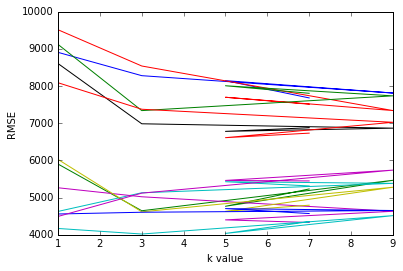

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

In [29]:
# Compute average RMSE across different `k` values for each feature.
feature_avg_rmse = {}
for k,v in k_rmse_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
series_avg_rmse.sort_values()

horsepower          4219.377860
width               4618.910560
curb-weight         4730.075815
highway-mpg         5069.469256
length              5176.394904
city-mpg            5202.409003
wheel-base          5252.392462
compression-rate    7166.073599
bore                7222.472445
stroke              8000.240467
peak-rpm            8119.365233
height              8163.346266
dtype: float64

In [30]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [5]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

two_best_features = ['horsepower', 'width']
rmse_val = knn_train_test(two_best_features, 'price', nr_cars)
k_rmse_results["two best features"] = rmse_val

three_best_features = ['horsepower', 'width', 'curb-weight']
rmse_val = knn_train_test(three_best_features, 'price', nr_cars)
k_rmse_results["three best features"] = rmse_val

four_best_features = ['horsepower', 'width', 'curb-weight', 'city-mpg']
rmse_val = knn_train_test(four_best_features, 'price', nr_cars)
k_rmse_results["four best features"] = rmse_val

five_best_features = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg']
rmse_val = knn_train_test(five_best_features, 'price', nr_cars)
k_rmse_results["five best features"] = rmse_val

six_best_features = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg', 'length']
rmse_val = knn_train_test(six_best_features, 'price', nr_cars)
k_rmse_results["six best features"] = rmse_val

k_rmse_results

{'five best features': {5: 3341.6024539726504},
 'four best features': {5: 3280.3807311630976},
 'six best features': {5: 3628.261188214127},
 'three best features': {5: 3305.9401397969677},
 'two best features': {5: 3589.3132622073304}}

The best result is with four features:
    
    horsepower', 'width', 'curb-weight', 'city-mpg'

and k = 5, with a rmse of 3280.4.

In [32]:
from sklearn.model_selection import cross_val_score, KFold

def knn_train_test(train_cols, target_col, df):
    kf = KFold(5, shuffle=True, random_state=1)
    knn = KNeighborsRegressor()
    mses = cross_val_score(knn, 
                       df[train_cols], 
                       df[target_col], 
                       scoring="neg_mean_squared_error", 
                       cv=kf)
    rmses = np.sqrt(np.absolute(mses))
    avg_rmse = np.mean(rmses)
    return avg_rmse

rmse_val = knn_train_test(['horsepower', 'width', 'curb-weight', 'city-mpg'],
                          'price', nr_cars)
print(rmse_val)

2931.1608893797184


Passing to the k-fold cross validation, from the 
test/train validation, we got a great improvement,
superior to 10%.

In conclusion of our analysis, we can say that we had 
our best predictions (meaning the one with the lower error)
using four features:
    
    'horsepower', 'width', 'curb-weight', 'city-mpg'
    
    with k = 5
    
    and using the k-fold cross validation.